# 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [56]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import dataset
house_price = pd.read_csv(r"C:\Users\Arpita\Downloads\train.csv",encoding = "ISO-8859-1")

In [5]:
#view dataset
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# informations on dataset
print(house_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Inspect the shape of the dataset

house_price.shape

(1460, 81)

The size of the datase is 1460*81. The datatypes on the dataset include objects,integer and float datatypes



In [8]:
# Inspect the different columsn in the dataset

house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Check the summary of the dataset

house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From the above information regarding the dataset it can conlude that there are many missing values and many categorical variables which we needed to be treated and create dummy variables respectively

# Step 1: Data Cleaning and Preparation

In [10]:
# Check the number of missing values in each column

house_price.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [11]:
# Checking the percentage of missing values
round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [12]:
#dropig columns having NAN values greater than 30% ie approximately NAN values greater than 450
for col in house_price.columns:
    if house_price[col].isnull().sum() > 450:
        house_price.drop(col, 1, inplace=True)

In [13]:
# Check the number of null values again
round(100*(house_price.isnull().sum()/len(house_price.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [14]:
house_price.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
                 ... 
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea

In [15]:
#checking unique values in following columns 
print(house_price['Street'].value_counts())
print(house_price['Utilities'].value_counts())
print(house_price['LandSlope'].value_counts())
print(house_price['Condition1'].value_counts())
print(house_price['Condition2'].value_counts())
print(house_price['RoofStyle'].value_counts())
print(house_price['ExterCond'].value_counts())
print(house_price['BsmtCond'].value_counts())
print(house_price['Heating'].value_counts())
print(house_price['CentralAir'].value_counts())
print(house_price['GarageCond'].value_counts())
print(house_price['PavedDrive'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Na

In [16]:
# Droping columns having any single unique value constituting more than 98% percentage,since they wont give much information 
house_price.drop(['Street', 'Utilities','Condition1'], axis = 1, inplace = True)

In [19]:
house_price.shape

(1460, 73)

In [20]:
house_price.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000


In [21]:
# Treating Missing values
Sum = house_price.isnull().sum().sort_values(ascending=False)
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Sum, percentage], axis=1, keys=['Sum', 'Percentage'])
missing_data.head

<bound method NDFrame.head of                Sum  Percentage
LotFrontage    259    0.177397
GarageType      81    0.055479
GarageCond      81    0.055479
GarageYrBlt     81    0.055479
GarageFinish    81    0.055479
GarageQual      81    0.055479
BsmtExposure    38    0.026027
BsmtFinType2    38    0.026027
BsmtFinType1    37    0.025342
BsmtCond        37    0.025342
BsmtQual        37    0.025342
MasVnrArea       8    0.005479
MasVnrType       8    0.005479
Electrical       1    0.000685
LotConfig        0    0.000000
RoofMatl         0    0.000000
BsmtFinSF1       0    0.000000
MSSubClass       0    0.000000
Foundation       0    0.000000
ExterCond        0    0.000000
ExterQual        0    0.000000
Exterior2nd      0    0.000000
Exterior1st      0    0.000000
RoofStyle        0    0.000000
LandSlope        0    0.000000
YearRemodAdd     0    0.000000
YearBuilt        0    0.000000
OverallCond      0    0.000000
BsmtFinSF2       0    0.000000
MSZoning         0    0.000000
...      

In [22]:
# Changing columns having NA values in categorical value columns
#you can find these features on the description data file provided

NA_with_meaning = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [23]:
for i in NA_with_meaning:
    house_price[i].fillna("None", inplace=True)
    house_price[i].fillna("None", inplace=True)

In [24]:
# Imputing mean,median mode values on columns having Null Values
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [25]:
# Treating Missing values
Sum = house_price.isnull().sum().sort_values(ascending=False)
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Sum, percentage], axis=1, keys=['Sum', 'Percentage'])
missing_data.head(10)

,Sum,Percentage
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
Foundation,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [26]:
# 'LotFrontage' column is having greater number of null values,so it is better to drop thet column
house_price.drop("LotFrontage", axis=1, inplace=True)

In [27]:
Sum = house_price.isnull().sum().sort_values(ascending=False)
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Sum, percentage], axis=1, keys=['Sum', 'Percentage'])
missing_data.head(10)

,Sum,Percentage
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
BsmtQual,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000
Foundation,0,0.000000
BsmtCond,0,0.000000


In [28]:
# Filling missing values in GarageYrBlt with median 
house_price["GarageYrBlt"].fillna(house_price["GarageYrBlt"].median(), inplace=True)
#filling missing values in MasVnrArea with median
house_price["MasVnrArea"].fillna(house_price["MasVnrArea"].median(), inplace=True)
#Filling missing values in MasVnrType with 'None' as in above
house_price["MasVnrType"].fillna("None", inplace=True)

In [29]:
#missing values
Sum = house_price.isnull().sum().sort_values(ascending=False)
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Sum, percentage], axis=1, keys=['Sum', 'Percentage'])
missing_data.head(10)

,Sum,Percentage
Electrical,1,0.000685
SalePrice,0,0.000000
BsmtQual,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000
Foundation,0,0.000000
BsmtCond,0,0.000000


In [30]:
#droping the row with only null value
house_price.dropna(inplace=True)

In [31]:
#missing value
Sum = house_price.isnull().sum().sort_values(ascending=False)
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Sum, percentage], axis=1, keys=['Sum', 'Percentage'])
missing_data.head(10)

,Sum,Percentage
SalePrice,0,0.0
SaleCondition,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtQual,0,0.0
BsmtCond,0,0.0


In [32]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 72 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
MasVnrArea       1459 non-null float64
ExterQual        1459 non-null object
ExterCond        1459 non

In [33]:
house_price_numerical = house_price.dtypes #type of each feature in data: int, float, object
house_price_numerical = house_price_numerical[(house_price_numerical == 'int64') | (house_price_numerical == float)] #numerical values are either type int or float

In [34]:
pd.DataFrame(house_price_numerical).reset_index().set_index(0).reset_index()[0].value_counts()

int64      35
float64     2
Name: 0, dtype: int64

In [35]:
#we should convert house_price_numerical to a list to make it easier to work with
house_price_numerical = list(house_price_numerical.index)

In [36]:
print(house_price_numerical)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#house_price.MasVnrArea = house_price.MasVnrArea.astype(int)
#house_price.GarageYrBlt = house_price.GarageYrBlt.astype(int)

In [39]:
#scaling continuous variables in the dataset
scaler = StandardScaler()

house_price[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']] = scaler.fit_transform(house_price[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])

house_price.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.073732,RL,-0.207125,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,0.138826,WD,Normal,208500
1,2,-0.871979,RL,-0.091909,Reg,Lvl,FR2,Gtl,Veenker,Norm,...,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-0.489318,-0.614137,WD,Normal,181500
2,3,0.073732,RL,0.073401,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,0.990298,0.138826,WD,Normal,223500
3,4,0.310159,RL,-0.096918,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,4.091057,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,-1.367100,WD,Abnorml,140000
4,5,0.073732,RL,0.374967,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,2.100010,0.138826,WD,Normal,250000


In [40]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch',

In [41]:
# finding columns with categorical variables for dummy variable creation
house_price_object = house_price.select_dtypes('object')

In [42]:
house_price_object.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:

# Creating a dummy variable for the variable 'MSZoning'
cont = pd.get_dummies(house_price['MSZoning'],prefix='MSZoning',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Lead Origin'
cont = pd.get_dummies(house_price['LotShape'],prefix='LotShape',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'LandContour'
cont = pd.get_dummies(house_price['LandContour'],prefix='LandContour',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'LandSlope'
cont = pd.get_dummies(house_price['LandSlope'],prefix='LandSlope',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Neighborhood'
cont = pd.get_dummies(house_price['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Condition2'
cont = pd.get_dummies(house_price['Condition2'],prefix='Condition2',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'BldgType'
cont = pd.get_dummies(house_price['BldgType'],prefix='BldgType',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'HouseStyle'
cont = pd.get_dummies(house_price['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'RoofStyle'
cont = pd.get_dummies(house_price['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'RoofMatl'
cont = pd.get_dummies(house_price['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior1st'
cont = pd.get_dummies(house_price['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior2nd'
cont = pd.get_dummies(house_price['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'MasVnrType'
cont = pd.get_dummies(house_price['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'ExterQual'
cont = pd.get_dummies(house_price['ExterQual'],prefix='ExterQual',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'ExterCond'
cont = pd.get_dummies(house_price['ExterCond'],prefix='ExterCond',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Foundation'
cont = pd.get_dummies(house_price['Foundation'],prefix='Foundation',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtQual'
cont = pd.get_dummies(house_price['BsmtQual'],prefix='BsmtQual',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtCond'
cont = pd.get_dummies(house_price['BsmtCond'],prefix='BsmtCond',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtExposure'
cont = pd.get_dummies(house_price['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType1'
cont = pd.get_dummies(house_price['BsmtFinType1'],prefix='BsmtFinType1',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType2'
cont = pd.get_dummies(house_price['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Heating'
cont = pd.get_dummies(house_price['Heating'],prefix='Heating',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'HeatingQC'
cont = pd.get_dummies(house_price['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'CentralAir'
cont = pd.get_dummies(house_price['CentralAir'],prefix='CentralAir',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Electrical'
cont = pd.get_dummies(house_price['Electrical'],prefix='Electrical',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'KitchenQual'
cont = pd.get_dummies(house_price['KitchenQual'],prefix='KitchenQual',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'Functional'
cont = pd.get_dummies(house_price['Functional'],prefix='Functional',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'GarageType'
cont = pd.get_dummies(house_price['GarageType'],prefix='GarageType',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'GarageFinish'
cont = pd.get_dummies(house_price['GarageFinish'],prefix='GarageFinish',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'GarageQual'
cont = pd.get_dummies(house_price['GarageQual'],prefix='GarageQual',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'GarageCond'
cont = pd.get_dummies(house_price['GarageCond'],prefix='GarageCond',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'PavedDrive'
cont = pd.get_dummies(house_price['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'SaleType'
cont = pd.get_dummies(house_price['SaleType'],prefix='SaleType',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

# Creating a dummy variable for the variable 'SaleCondition'
cont = pd.get_dummies(house_price['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Adding the results to the master dataframe
house_price = pd.concat([house_price,cont],axis=1)

In [44]:

house_price.shape

(1459, 263)

In [45]:
#created dummies for the below variables, so drop the same
house_price = house_price.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],axis = 1)

In [46]:
house_price.shape

(1459, 228)

In [47]:
house_price.head(4)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073732,-0.207125,0.650852,-0.517424,1.051899,0.879449,0.513594,0.574748,-0.28876,...,0,0,0,0,1,0,0,0,1,0
1,2,-0.871979,-0.091909,-0.072372,2.178727,0.157540,-0.428864,-0.571009,1.171304,-0.28876,...,0,0,0,0,1,0,0,0,1,0
2,3,0.073732,0.073401,0.650852,-0.517424,0.985650,0.830993,0.325449,0.092239,-0.28876,...,0,0,0,0,1,0,0,0,1,0
3,4,0.310159,-0.096918,0.650852,-0.517424,-1.863050,-0.719600,-0.571009,-0.499931,-0.28876,...,0,0,0,0,1,0,0,0,0,0


In [48]:
house_price.info()
house_price.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 228 entries, Id to SaleCondition_Partial
dtypes: float64(35), int64(2), uint8(191)
memory usage: 705.3 KB


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)

We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

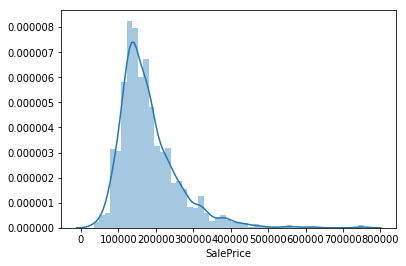

In [49]:
sns.distplot(house_price["SalePrice"])

In [50]:
house_price["TransformedPrice"] = house_price["SalePrice"]

# Model Building

In [88]:
X = house_price.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = house_price["TransformedPrice"].values

In [89]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [90]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [91]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [92]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
#feature elimination using rfe
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 50)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[False False False False False False False  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False  True  True False  True False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True False False False  True False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False  True  True False  True False False False False
 False  True  True  True  True False  True False False False False False
  True False False False  True False False False Fa

In [94]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   51.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.410424,0.024777,0.0014,1.356522e-03,0.0001,{'alpha': 0.0001},-18234.878989,-25526.935404,-23997.807467,-21444.496743,...,-21711.370906,2736.754725,28,-12939.348250,-11825.000636,-12661.208454,-13311.278015,-12932.470918,-12733.861255,499.276852
1,0.390422,0.011290,0.0008,4.000187e-04,0.001,{'alpha': 0.001},-18234.841290,-25526.506300,-23997.744214,-21443.368304,...,-21711.019239,2736.673595,27,-12939.374909,-11824.967146,-12661.211366,-13311.285269,-12932.510055,-12733.869749,499.295946
2,0.419424,0.038972,0.0010,1.168008e-07,0.01,{'alpha': 0.01},-18234.457904,-25522.227072,-23997.104426,-21432.086263,...,-21707.574471,2735.807878,26,-12939.741590,-11824.946150,-12661.336204,-13311.431220,-12932.947678,-12734.080569,499.398737
3,0.409824,0.022544,0.0010,9.536743e-08,0.05,{'alpha': 0.05},-18232.547508,-25506.119491,-23987.802862,-21377.983368,...,-21690.867932,2731.779197,25,-12941.613362,-11824.993660,-12661.917243,-13312.165582,-12934.932737,-12735.124517,499.846944
4,0.391023,0.023127,0.0010,9.536743e-08,0.1,{'alpha': 0.1},-18229.511034,-25487.715324,-23975.876494,-21368.234120,...,-21681.043250,2726.661858,24,-12943.912695,-11825.238463,-12662.723904,-13313.174722,-12937.428159,-12736.495589,500.357150


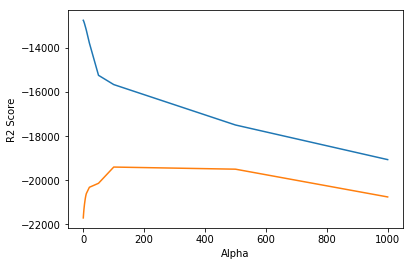

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [97]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
lasso.coef_

array([-5.63356089e+03,  3.50688152e+03,  1.30467212e+04,  6.18909289e+03,
        5.42504316e+03,  2.14124189e+03,  3.82513970e+03,  6.79577359e+02,
        1.07986126e+03, -0.00000000e+00,  1.60413687e+03,  0.00000000e+00,
        6.75505578e+03, -1.34471280e+03,  2.29849251e+04,  4.97236184e+03,
        9.95671136e+02,  5.06069616e+03,  4.71662163e+02, -3.24009270e+03,
       -3.84122246e+03,  2.96088211e+03,  2.08401591e+03, -1.03595256e+03,
        9.42011342e+03, -1.25840097e+03,  8.64251800e+02, -4.51917580e+02,
        4.45452841e+02,  5.92731584e+02,  1.26816211e+03, -2.12579575e+03,
        3.27793451e+02, -5.66782374e+02, -7.62318866e+02,  9.27578419e+03,
        3.55528784e+03,  4.43321222e+03,  0.00000000e+00,  0.00000000e+00,
       -3.01966573e+04, -3.65620241e+02,  1.92783654e+04,  2.07822227e+04,
        1.53362685e+04, -2.49750342e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.36771621e+02,  2.55154495e+03,  1.86264756e+03,
        2.15661820e+04, -

In [99]:
# Ridge Regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011601,0.000800,0.0006,4.899403e-04,0.0001,{'alpha': 0.0001},-18245.661017,-26864.411268,-24005.649049,-21408.099876,...,-21975.401961,3132.336597,27,-12941.154492,-11829.060570,-12660.722831,-13309.492008,-12935.027079,-12735.091396,497.753931
1,0.012801,0.001166,0.0010,1.784161e-07,0.001,{'alpha': 0.001},-18283.378360,-26749.654399,-23899.910060,-21401.162023,...,-21934.942375,3076.308920,26,-12959.528580,-11833.434997,-12665.718171,-13310.243835,-12961.526591,-12746.090435,499.927452
2,0.015401,0.001960,0.0012,3.998995e-04,0.01,{'alpha': 0.01},-18661.176999,-25845.988774,-23199.852877,-21347.123052,...,-21675.329058,2622.544810,25,-13178.142039,-11997.643183,-12789.014522,-13317.883639,-13246.627082,-12905.862093,489.598579
3,0.019201,0.002227,0.0008,4.000425e-04,0.05,{'alpha': 0.05},-19587.600919,-24082.085958,-22296.898607,-21155.466947,...,-21419.713383,1633.676608,24,-13818.693055,-12971.390940,-13464.883453,-13350.409777,-14143.993805,-13549.874206,401.719815
4,0.012401,0.000800,0.0008,3.999949e-04,0.1,{'alpha': 0.1},-20047.779252,-23464.012553,-22014.507970,-20991.260705,...,-21411.061990,1213.792537,23,-14173.935196,-13644.058917,-14048.019131,-13387.352527,-14704.664670,-13991.606088,454.046315


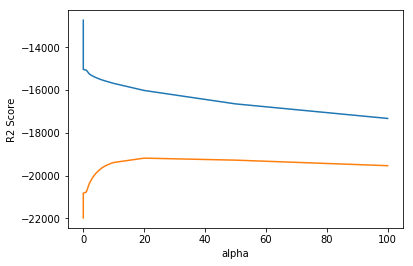

In [101]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.show()

In [102]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.47908602e+03,  3.54873230e+03,  1.47539090e+04,  6.02650669e+03,
        5.34641530e+03,  2.39650937e+03,  4.37748493e+03,  4.95469647e+02,
        8.31331567e+02,  8.53917666e+02,  1.68201212e+03,  4.82147910e+03,
        1.33933748e+04, -6.17430726e+02,  1.46133246e+04,  5.65885149e+03,
        1.22916361e+03,  5.31936436e+03,  1.39731634e+03, -3.48921094e+03,
       -3.71801734e+03,  3.81089321e+03,  2.50991448e+03, -1.29250833e+03,
        1.07535314e+04, -1.74137679e+03,  1.83924804e+03, -8.78020536e+02,
        7.41876494e+02,  7.85290455e+02,  1.59346883e+03, -2.60843720e+03,
        2.98694333e+02, -6.50190126e+02, -9.83515540e+02,  7.94418683e+03,
        3.50287243e+03,  4.88462003e+03, -1.42418677e+03,  1.75741654e+03,
       -1.62389492e+04, -1.24816738e+03,  1.40045106e+04,  1.16663699e+04,
        1.27790296e+04, -2.69056718e+02, -1.62693998e+03, -5.90527465e+02,
       -8.39760594e+02,  1.52926904e+03,  2.45917139e+03, -2.87555002e+03,
        1.53933153e+04, -